In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

# import CO/ONeMg WD table

In [2]:
coTable = pd.read_table('msp_galactic_binary_co_Mmed_2017June29_ecc_error_lt_50percent_plus2053_2045.txt',
                        header=None, sep='\s+',usecols=[1,3,5], names=['P','Ecc','M_c'])

# Period

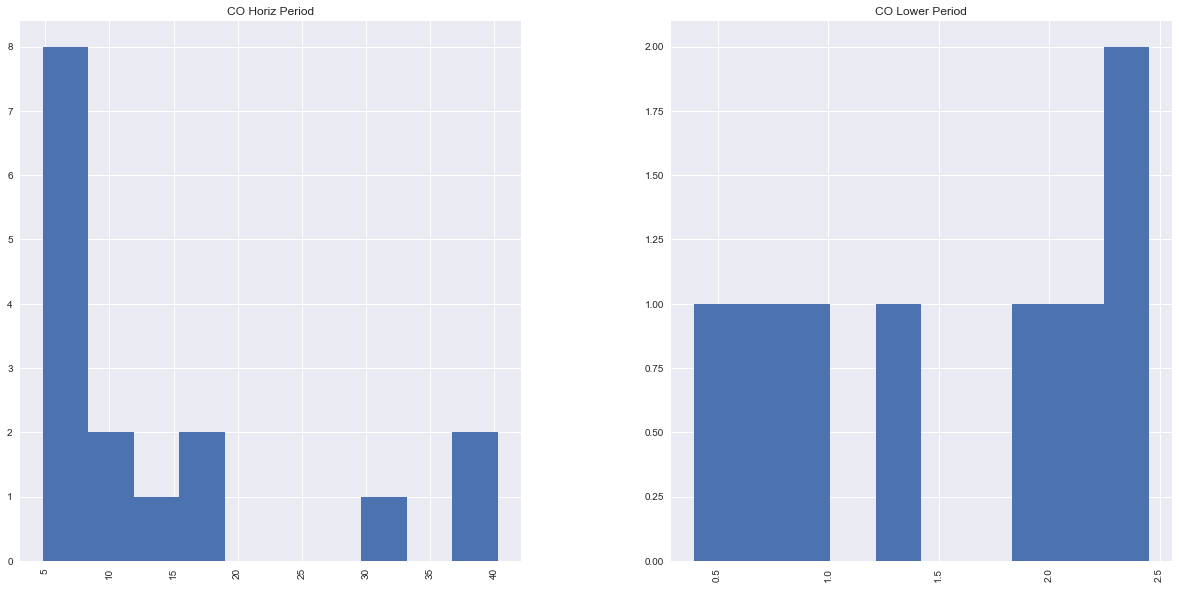

In [3]:
coLowerP = coTable['P'].loc[coTable['P'] < 2.5]
coHorizP = coTable['P'].loc[coTable['P'] > 2.5]

y1 = coLowerP
y2 = coHorizP
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['CO Lower Period']*len(coLowerP), ['CO Horiz Period']*len(coHorizP)]))

y.hist('value', by='group',figsize=(20,10));

In [4]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [5]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 99%|█████████▉| 217618/220000 [06:02<00:03, 600.76it/s]/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 3 does not match the target. It is 0.684725522748, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 3 contains 94 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
100%|██████████| 220000/220000 [06:05<00:00, 601.52it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10fbf2fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1150d6e10>], dtype=object)

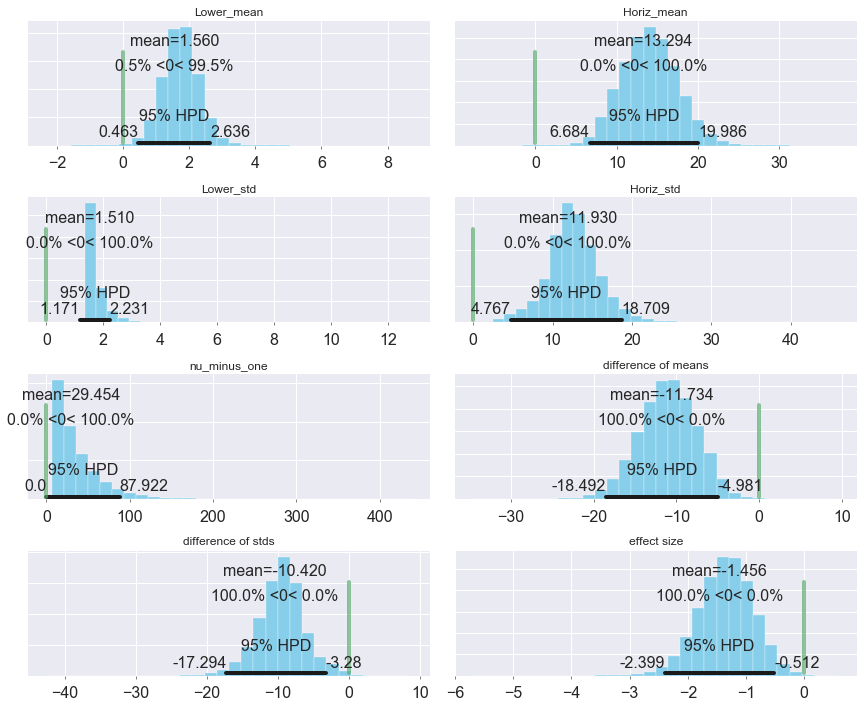

In [6]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bc19090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116be29d0>], dtype=object)

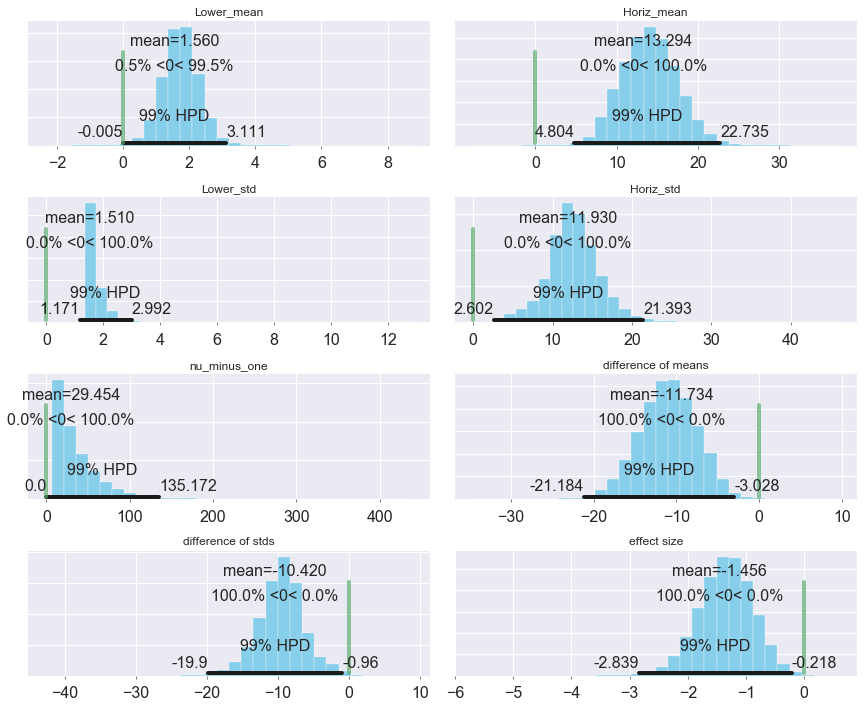

In [7]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Ecc

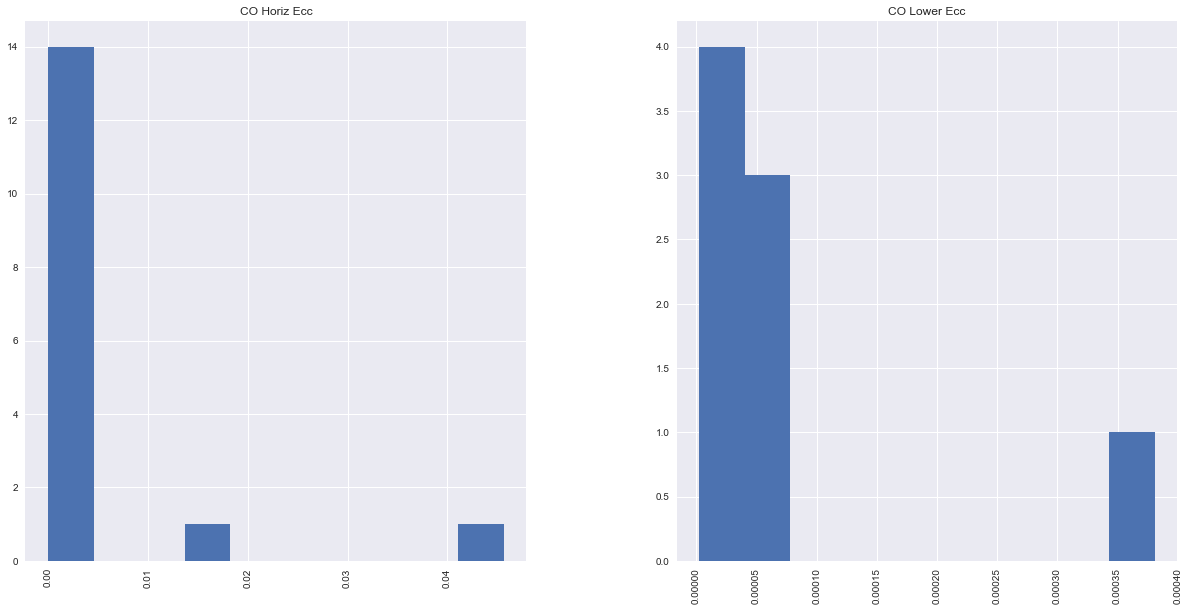

In [8]:
coLowerEcc = coTable['Ecc'].loc[coTable['P'] < 2.5]
coHorizEcc = coTable['Ecc'].loc[coTable['P'] > 2.5]

y1 = coLowerEcc
y2 = coHorizEcc
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['CO Lower Ecc']*len(coLowerEcc), ['CO Horiz Ecc']*len(coHorizEcc)]))

y.hist('value', by='group',figsize=(20,10));

In [9]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [10]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [06:13<00:00, 589.70it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1194db990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1077e2350>], dtype=object)

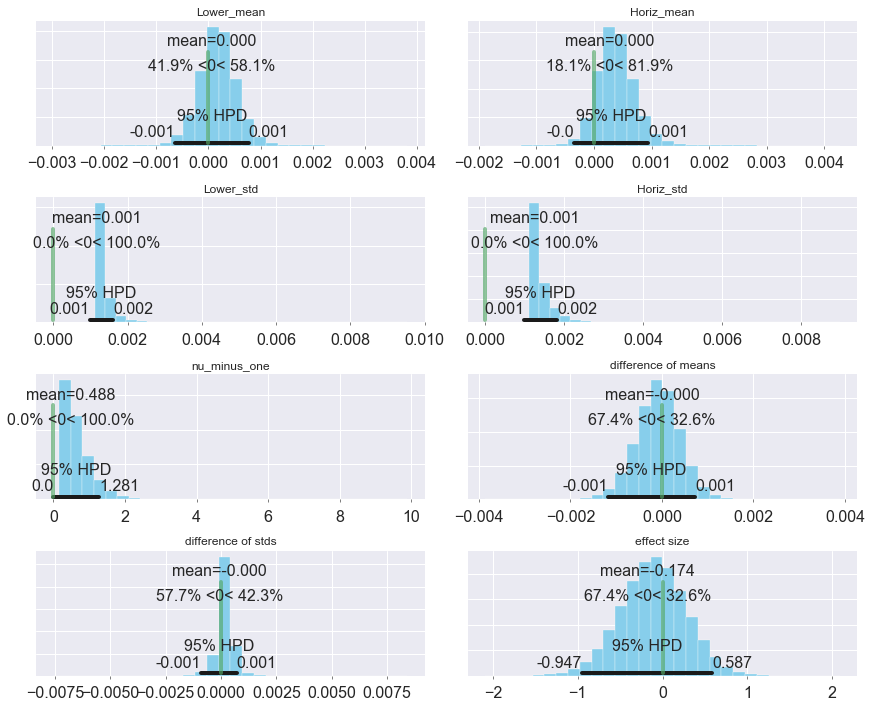

In [11]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1155890d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1121edd50>], dtype=object)

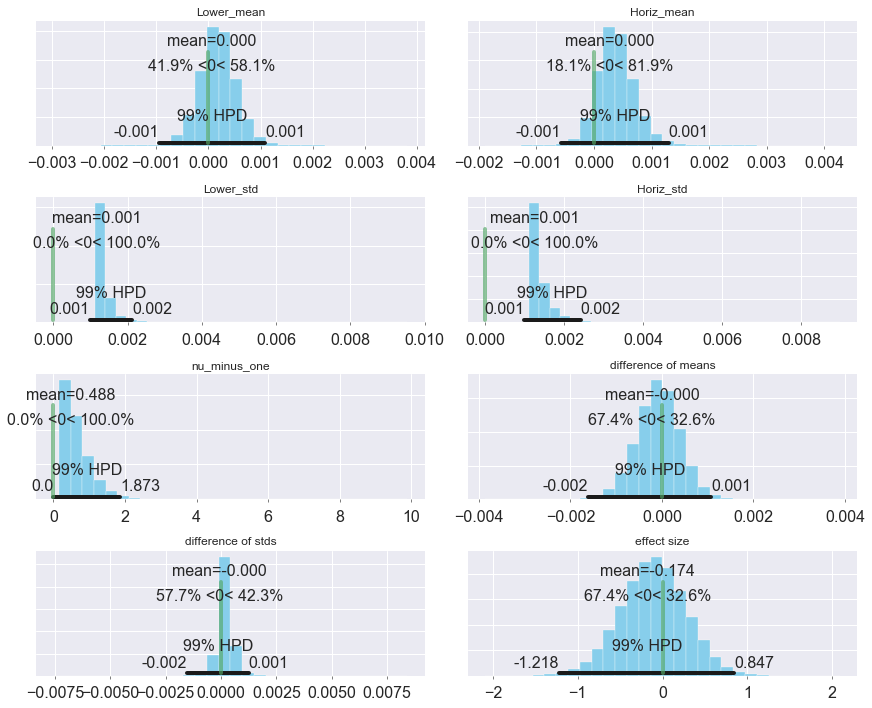

In [12]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# M_c

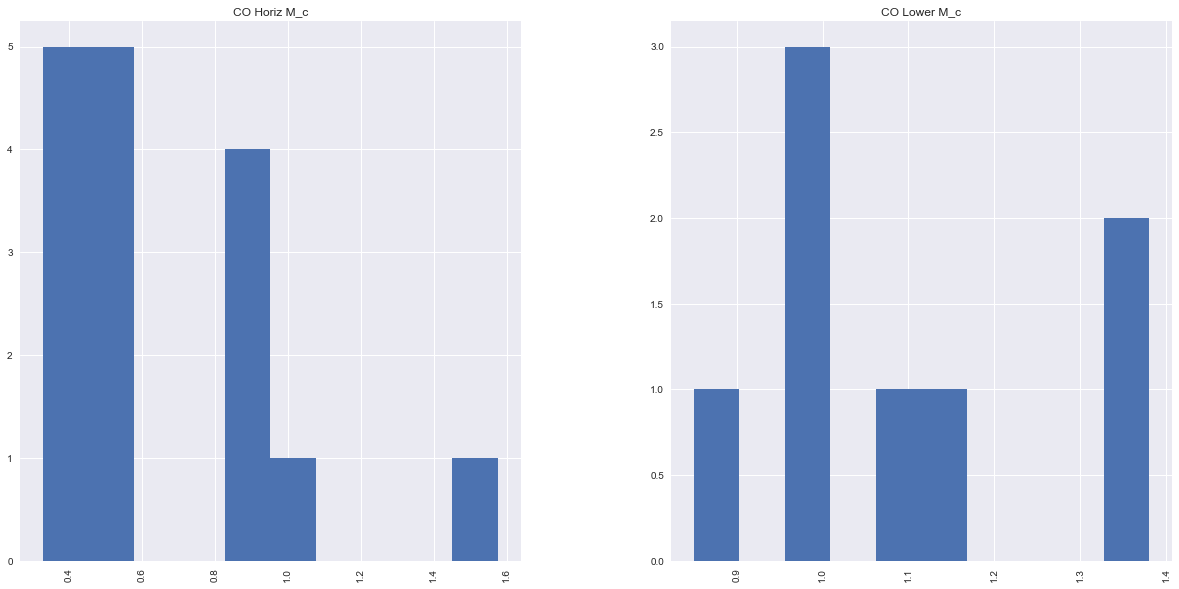

In [14]:
coLowerM_c = coTable['M_c'].loc[coTable['P'] < 2.5]
coHorizM_c = coTable['M_c'].loc[coTable['P'] > 2.5]

y1 = coLowerM_c
y2 = coHorizM_c
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['CO Lower M_c']*len(coLowerM_c), ['CO Horiz M_c']*len(coHorizM_c)]))

y.hist('value', by='group',figsize=(20,10));

In [15]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [16]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:18<00:00, 690.94it/s]/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 4 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.

/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 3 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 3 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11158c2d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113bfd0d0>], dtype=object)

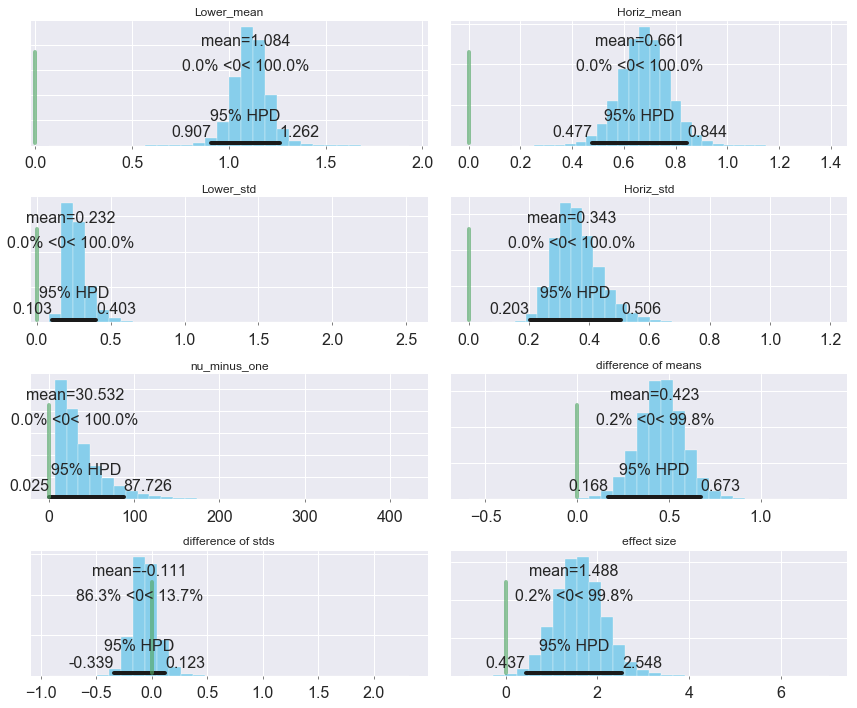

In [17]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1130202d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110bd0510>], dtype=object)

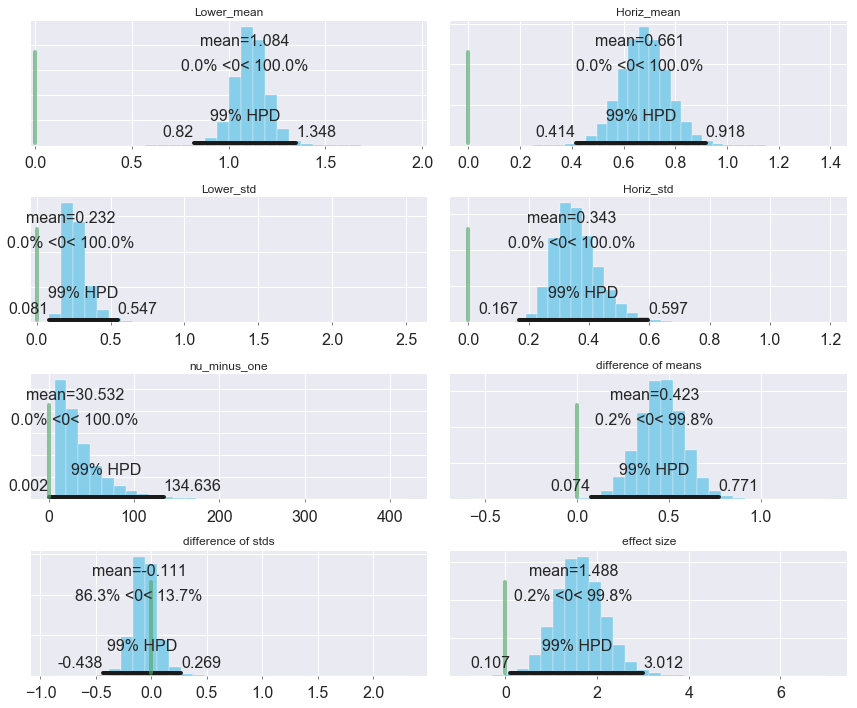

In [18]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log P

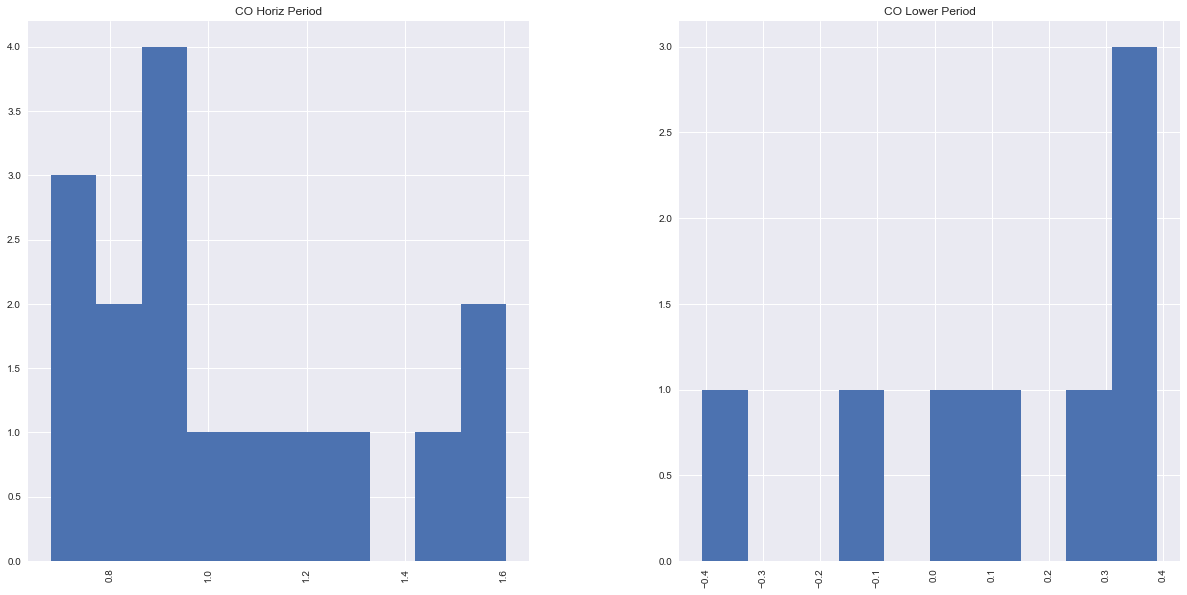

In [19]:
coLowerP = coTable['P'].loc[coTable['P'] < 2.5]
coHorizP = coTable['P'].loc[coTable['P'] > 2.5]

y1 = np.log10(coLowerP)
y2 = np.log10(coHorizP)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['CO Lower Period']*len(coLowerP), ['CO Horiz Period']*len(coHorizP)]))

y.hist('value', by='group',figsize=(20,10));

In [20]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [21]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [06:47<00:00, 540.40it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1152bba90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115fa2550>], dtype=object)

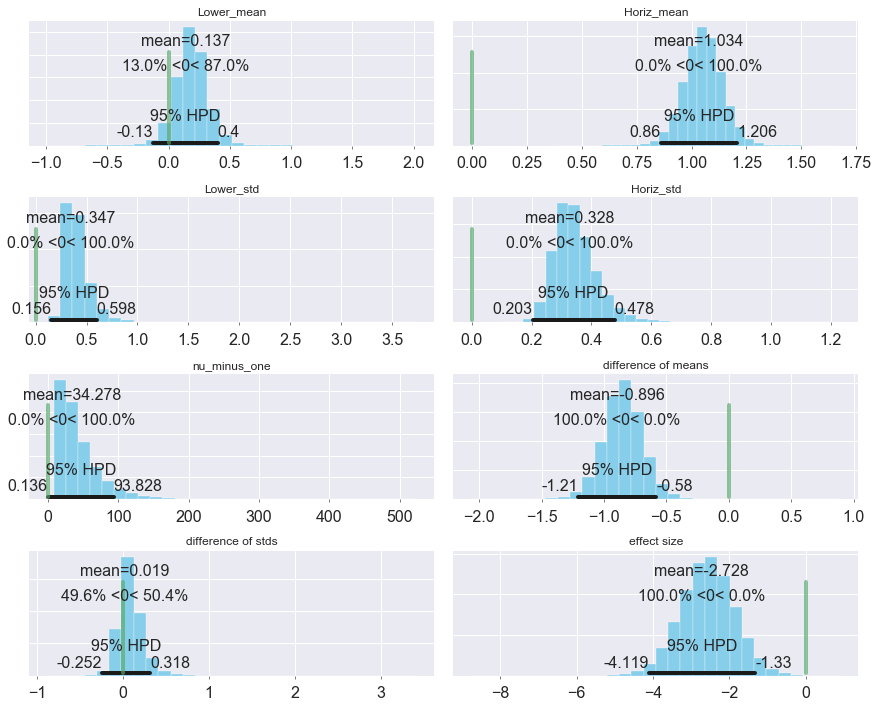

In [22]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1160f1550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1180d7cd0>], dtype=object)

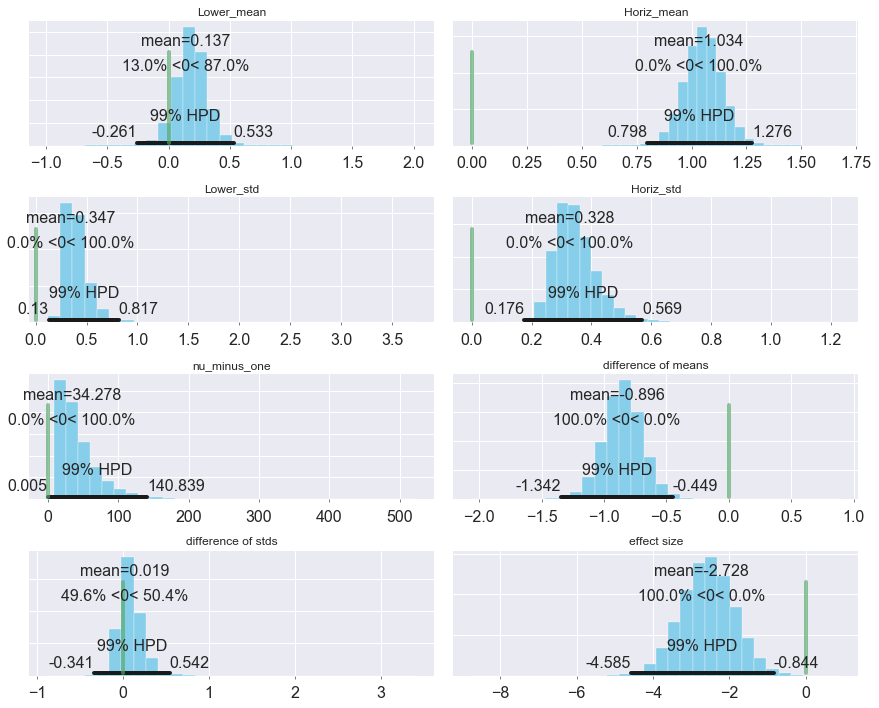

In [23]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Ecc

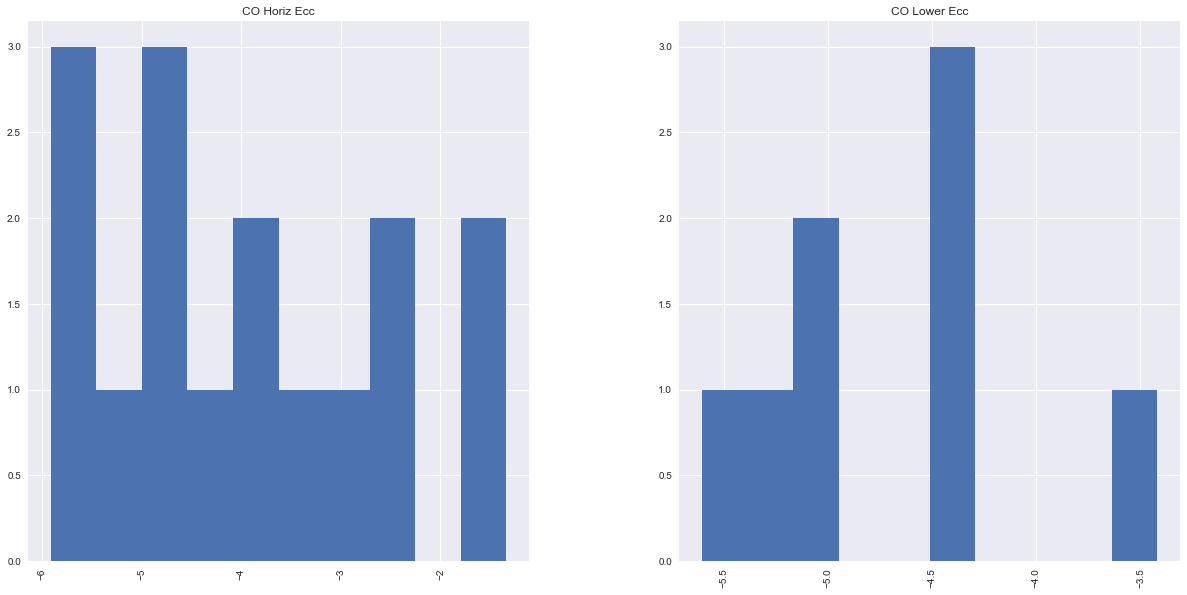

In [3]:
coLowerEcc = coTable['Ecc'].loc[coTable['P'] < 2.5]
coHorizEcc = coTable['Ecc'].loc[coTable['P'] > 2.5]

y1 = np.log10(coLowerEcc)
y2 = np.log10(coHorizEcc)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['CO Lower Ecc']*len(coLowerEcc), ['CO Horiz Ecc']*len(coHorizEcc)]))

y.hist('value', by='group',figsize=(20,10));

In [4]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [5]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:50<00:00, 627.88it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11066ca10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1169f5dd0>], dtype=object)

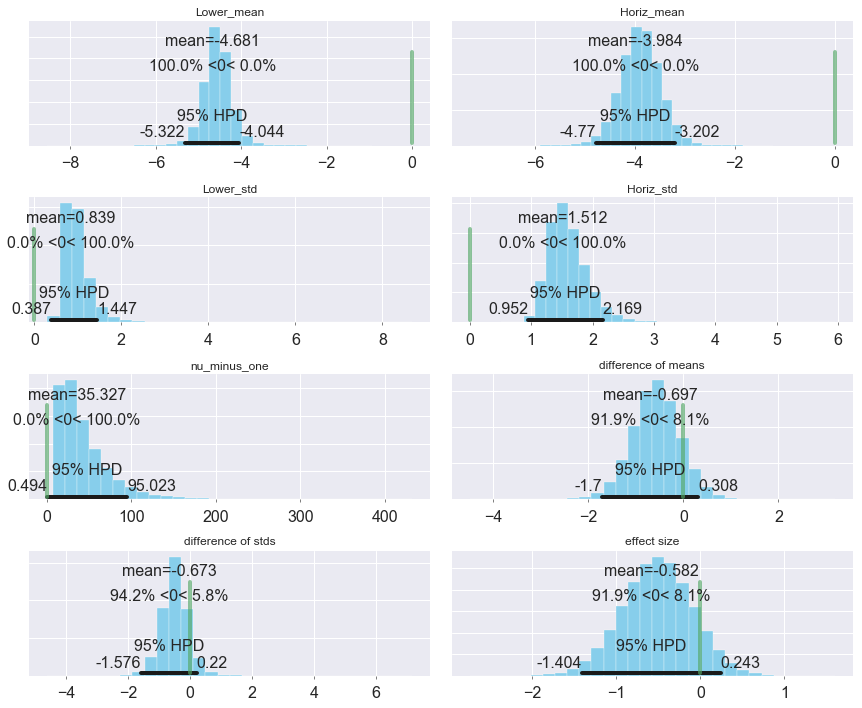

In [6]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119d66090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x107fdc590>], dtype=object)

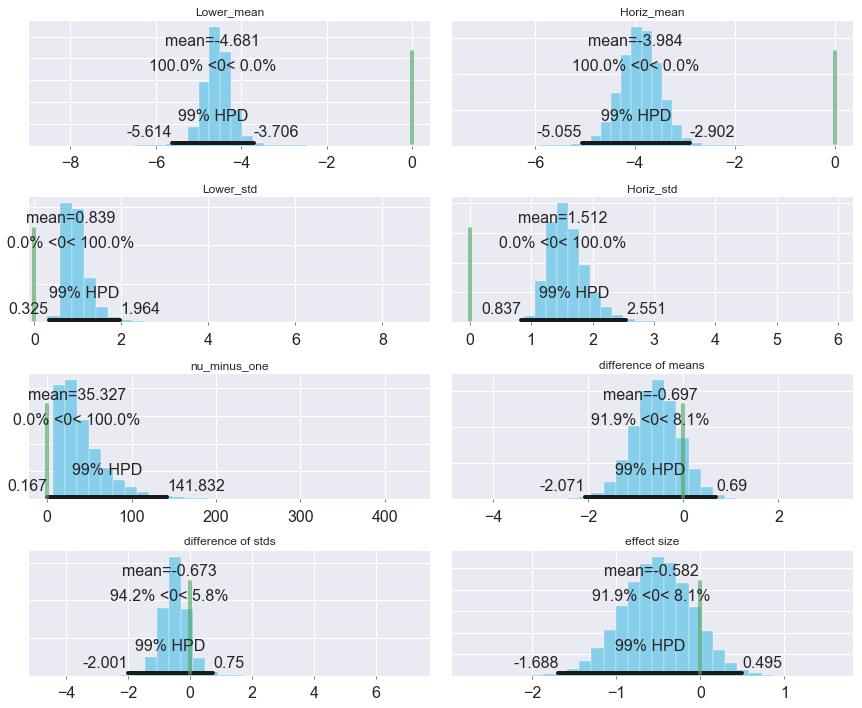

In [7]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log M_c

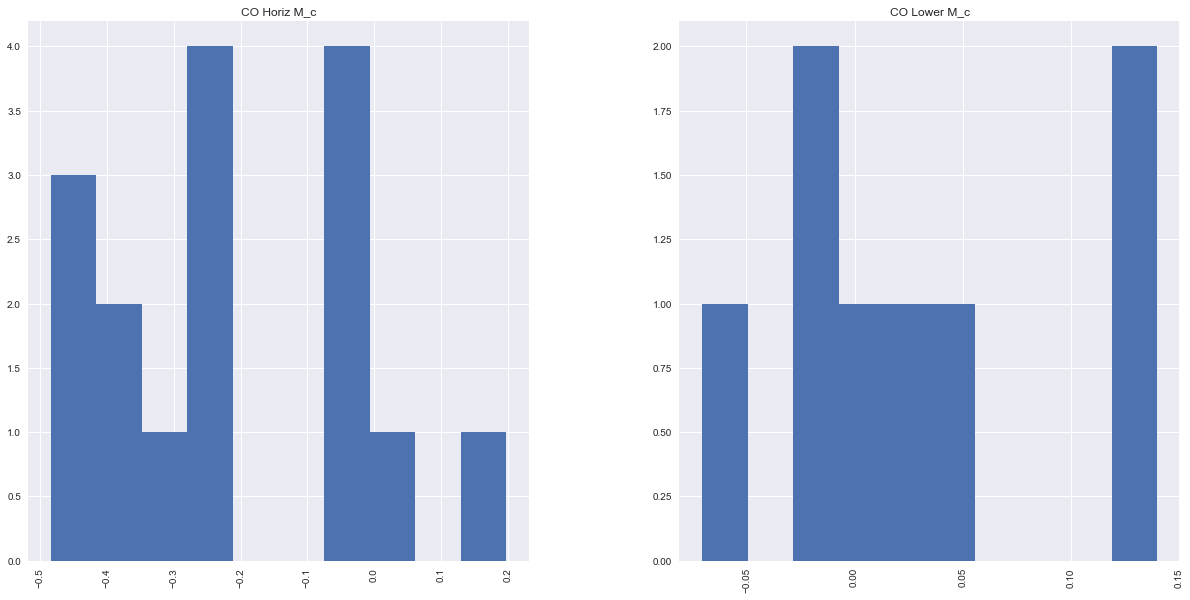

In [8]:
coLowerM_c = coTable['M_c'].loc[coTable['P'] < 2.5]
coHorizM_c = coTable['M_c'].loc[coTable['P'] > 2.5]

y1 = np.log10(coLowerM_c)
y2 = np.log10(coHorizM_c)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['CO Lower M_c']*len(coLowerM_c), ['CO Horiz M_c']*len(coHorizM_c)]))

y.hist('value', by='group',figsize=(20,10));

In [9]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    Lower_mean = pm.Normal('Lower_mean', mu_m, sd=mu_s)
    Horiz_mean = pm.Normal('Horiz_mean', mu_m, sd=mu_s)
    
    Lower_std = pm.Uniform('Lower_std', lower=sigma_low, upper=sigma_high)
    Horiz_std = pm.Uniform('Horiz_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    Lower_lambda = Lower_std**-2
    Horiz_lambda = Horiz_std**-2
    
    Lower_group = pm.StudentT('Lower', nu=nu, mu=Lower_mean, lam=Lower_lambda, observed=y1)
    Horiz_group = pm.StudentT('Horiz', nu=nu, mu=Horiz_mean, lam=Horiz_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', Lower_mean - Horiz_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Lower_std - Horiz_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((Lower_std**2 + Horiz_std**2) / 2))

In [10]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [07:11<00:00, 509.60it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x111319090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10dfaea90>], dtype=object)

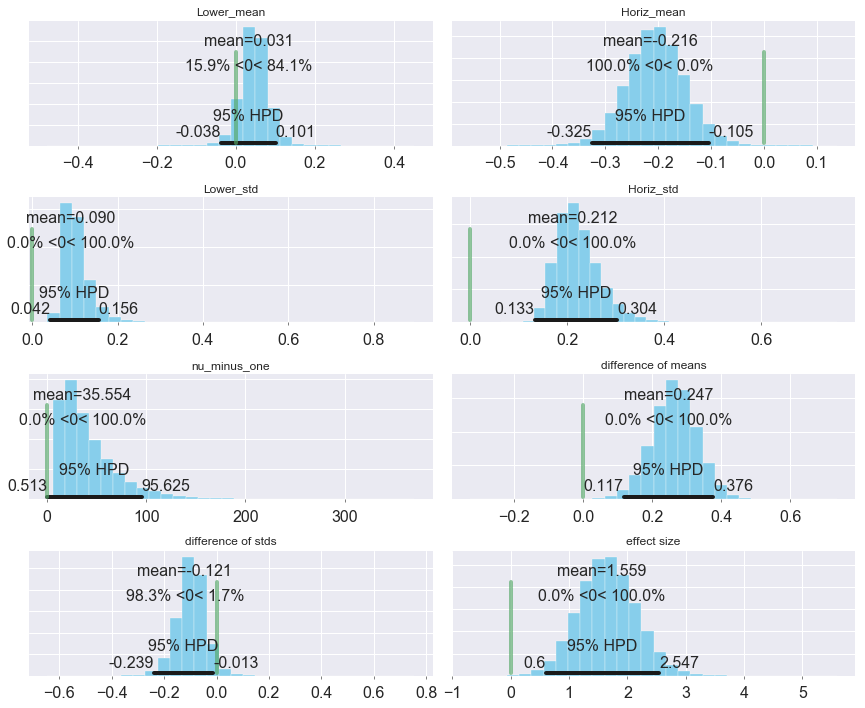

In [11]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x108100a50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115e37e50>], dtype=object)

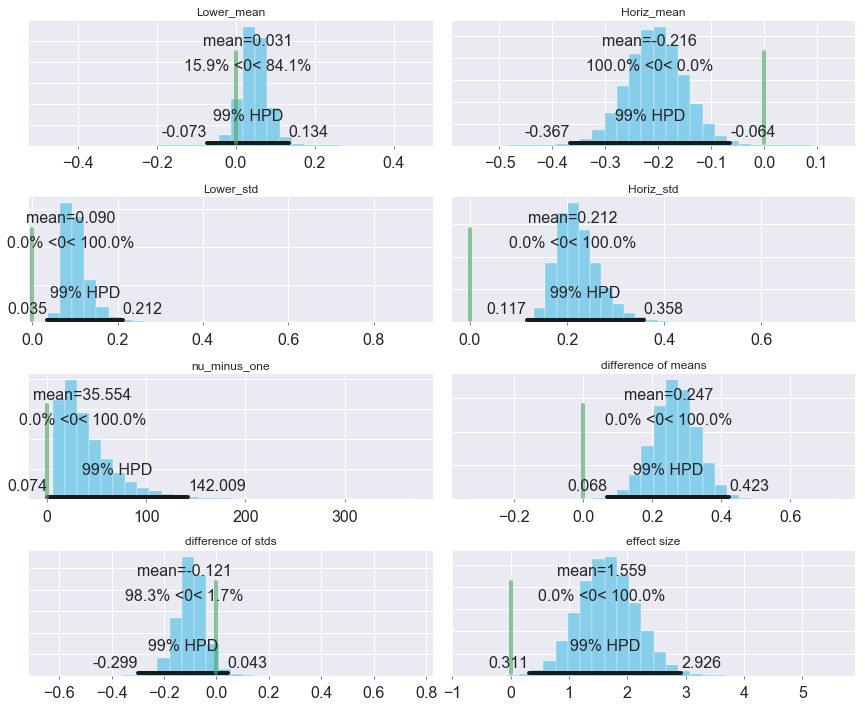

In [12]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['Lower_mean','Horiz_mean', 'Lower_std', 'Horiz_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')